<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [40]:
import pandas as pd
# importing numpy as np
import numpy as np
 # importing pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import norm

Load the dataset into a dataframe.


In [41]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


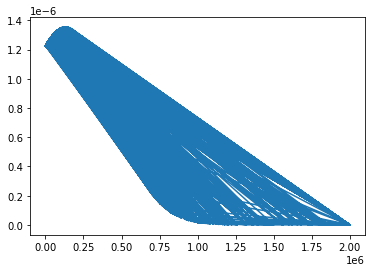

In [42]:
# your code goes here
# Plot between -10 and 10 with .001 steps.
df['ConvertedComp'].dropna(inplace=True)
x_axis = df['ConvertedComp']
  
# Calculating mean and standard deviation
mean = df['ConvertedComp'].mean()
sd = df['ConvertedComp'].std()
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

Plot the histogram for the column `ConvertedComp`.


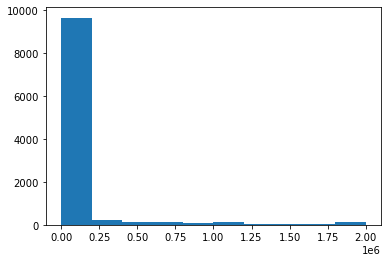

In [43]:
# your code goes here
plt.hist(df['ConvertedComp'])
plt.show()

What is the median of the column `ConvertedComp`?


In [44]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [45]:
# your code goes here
len(df[df['Gender'] == 'Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [46]:
# your code goes here
df[df['Gender'] == 'Woman'].ConvertedComp.median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [47]:
# your code goes here
print(df['Age'].min(), np.quantile(df['Age'], 0.25), df['Age'].median(), np.quantile(df['Age'], 0.75), df['Age'].max())

16.0 nan 29.0 nan 99.0


Plot a histogram of the column `Age`.


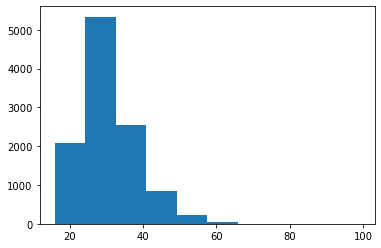

In [48]:
# your code goes here
plt.hist(df['Age'])
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

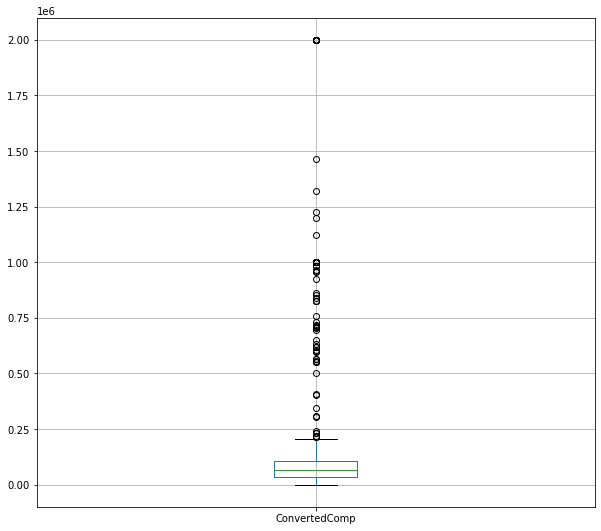

In [49]:
# your code goes here
df.dropna(inplace=True)
df['ConvertedComp'].isnull().sum()
df.boxplot(column =['ConvertedComp'], grid = True, figsize=(10,9))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [50]:
# your code goes here
Q3 = np.quantile(df['ConvertedComp'], 0.75)
print(Q3)
Q1 = np.quantile(df['ConvertedComp'], 0.25)
print(Q1)
IQR =Q3 - Q1
print(IQR)

105247.5
34405.0
70842.5


Find out the upper and lower bounds.


In [51]:
# your code goes here
lower_limit = Q1 - 1.5 * IQR
print(lower_range)
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)

-71858.75
211511.25


Identify how many outliers are there in the `ConvertedComp` column.


In [52]:
# your code goes here
df[(df['ConvertedComp'] < lower_limit) | (df['ConvertedComp'] > upper_limit)].ConvertedComp.count()


71

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [53]:
# your code goes here
df2 = df[~((df['ConvertedComp'] < lower_limit) &(df['ConvertedComp'] > upper_limit))]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [54]:
# your code goes here
df2.corr()['Age'] 

Respondent       0.027928
CompTotal        0.012503
ConvertedComp    0.109655
WorkWeekHrs      0.040690
CodeRevHrs      -0.007431
Age              1.000000
Name: Age, dtype: float64

In [55]:
df2['Age'].median()

29.0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
